In [11]:
# Load packages
import os
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt

# Verify Opencv version
print('OpenCV version: ' + cv2.__version__)

OpenCV version: 3.1.0


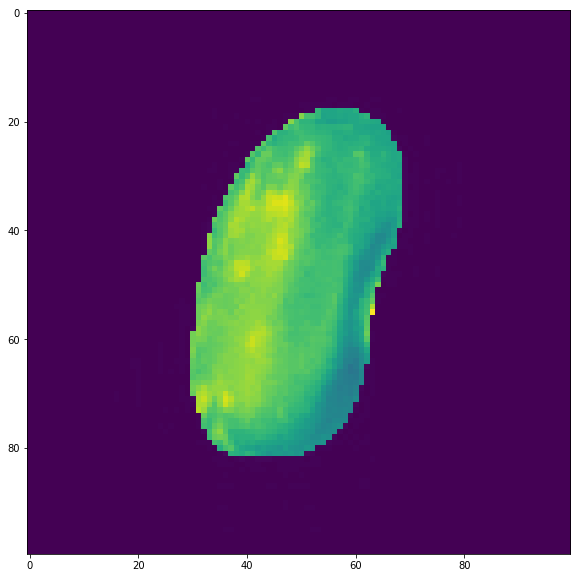

In [12]:
# Function: grep
def grep(l, s):
    return [i for i in l if s in i]

root = '/Users/haachicanoy/Documents/Data/Computer_vision/clear_bckg/_img_sgmn'
paths = [ path for path in os.listdir(root) if os.path.isdir(os.path.join(root, path)) ]

for i in range(0, len(paths)):
    paths[i] = root + '/' + paths[i]

# Read images and convert them to gray format
root = '/Users/haachicanoy/Documents/Data/Computer_vision/clear_bckg/_img_sgmn/18ACA03060_000'
img_list = os.listdir(root)
img_list = grep(img_list, '.jpg')

bgr_imgs = [cv2.imread(file) for file in glob.glob(root + "/*.jpg")]
gry_imgs = bgr_imgs

for i in range(0, len(bgr_imgs)):
    gry_imgs[i] = cv2.cvtColor(bgr_imgs[i], cv2.COLOR_BGR2GRAY) # 0.299*R + 0.587*G + 0.114*B

# Plot grayscale image
plt.figure(figsize=(20,10))
plt.imshow(gry_imgs[1])
plt.show()

In [13]:
# Dense SIFT function
def dense_sift(gray_img, step_size):
    # SIFT calculator
    sift = cv2.xfeatures2d.SIFT_create()
    # Define step size
    kp = [cv2.KeyPoint(x, y, step_size) for y in range(0, gray_img.shape[0], step_size)
                                        for x in range(0, gray_img.shape[1], step_size)]
    kp, desc = sift.compute(gray_img, kp)
    return kp, desc

In [14]:
img_kp   = [None]*len(gry_imgs)
img_desc = [None]*len(gry_imgs)

for i in range(0, len(gry_imgs)):
    img_kp[i], img_desc[i] = dense_sift(gry_imgs[i], step_size = 8)

In [21]:
print(img_desc[1].shape[0])
print(len(img_desc))
x = np.reshape(img_desc, (img_desc[0].shape[0]*len(img_desc), 128))
x = np.float32(x)

169
100


In [7]:
temp, classified_points, means = cv2.kmeans(data = x,
                                            K = 1000,
                                            bestLabels = None,
                                            criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, 1, 20),
                                            attempts = 10,
                                            flags = cv2.KMEANS_RANDOM_CENTERS)

In [8]:
print(means)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   5.   0.   0.]
 [  0.   0.   0. ...   1.   0.   0.]
 ...
 [  5.  27. 213. ...   0.   0.   0.]
 [  0.   0. 240. ...   0.   0.   0.]
 [  1.   1. 255. ...   0.   0.   0.]]


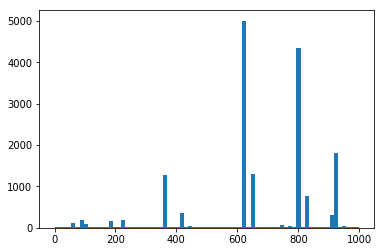

In [10]:
plt.hist(classified_points, bins = 'auto')
plt.show()